Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func:`~sklearn.datasets.fetch_california_housing`) and the Ames housing
    datas

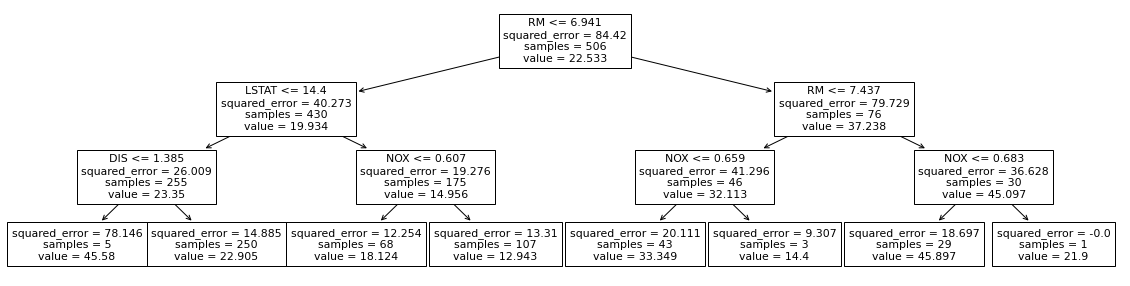

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor, plot_tree

d = load_boston()
df = pd.DataFrame(d['data'], columns=d['feature_names'])
y = pd.Series(d['target'])
df = df[['RM', 'LSTAT', 'DIS', 'NOX']]
clf = DecisionTreeRegressor(max_depth=3)
clf.fit(df, y)
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111)
_ = plot_tree(clf, ax=ax, feature_names=df.columns)

In [36]:

import shap
import tabulate
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(df[:1])
print(tabulate.tabulate(pd.DataFrame(
    {'shap_value': shap_values.squeeze(),
     'feature_value': df[:1].values.squeeze()}, index=df.columns),
                        tablefmt="github", headers="keys"))

|       |   shap_value |   feature_value |
|-------|--------------|-----------------|
| RM    |    -2.41902  |           6.575 |
| LSTAT |     2.46131  |           4.98  |
| DIS   |    -0.329802 |           4.09  |
| NOX   |     0.659899 |           0.538 |


In [37]:
shap_values_df=pd.DataFrame(explainer.shap_values(df.squeeze()),columns=df.columns)


,RM,LSTAT,DIS,NOX
0,-2.419016,2.461312,-0.329802,0.659899
1,-2.419016,2.461312,-0.329802,0.659899
2,8.647455,1.243288,-0.137657,1.062944
3,8.647455,1.243288,-0.137657,1.062944
4,8.647455,1.243288,-0.137657,1.062944
...,...,...,...,...
501,-2.419016,2.461312,-0.329802,0.659899
502,-2.419016,2.461312,-0.329802,0.659899
503,8.647455,1.243288,-0.137657,1.062944
504,-2.419016,2.461312,-0.329802,0.659899


In [38]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=0.5, min_samples=2).fit(shap_values_df)

In [39]:
clustering.labels_

array([ 0,  0,  1,  1,  1,  0,  0,  2,  2,  2,  2,  0,  2,  0,  0,  0,  0,
        2,  0,  0,  2,  0,  2,  2,  2,  2,  2,  2,  0,  0,  2,  0,  2,  2,
        2,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  2,  2,  2,  0,
        0,  0,  0,  2,  1,  0,  0,  0,  0,  0,  2,  0,  0,  1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  3,  3,  1,  0,  0,
        0,  0,  0,  2,  2,  0,  0,  2,  0,  0,  2,  2,  0,  2,  0,  0,  2,
        0,  0,  0,  2,  2,  2,  2,  2,  4,  4,  4,  5,  5,  5,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  6,  7,  6,  7,  7,  7,  7,  7,  8,  8,  8,
        7,  7,  7,  7,  1,  0,  8,  0,  3,  3,  3,  0,  0,  3,  0,  0,  0,
        2,  0,  2,  0,  0,  0,  0,  0,  0,  1,  3,  0,  1,  0,  0,  0,  3,
        0,  0,  1,  1,  0,  1,  0,  0,  3,  1,  1,  1,  1,  1,  0,  3,  3,
        3,  0,  0,  2,  2,  2,  2,  2,  2,  0,  2,  0,  0,  0,  2,  0,  1,
        2,  0,  0,  3,  3

In [54]:
shap_values_df=shap_values_df.assign(cluster=clustering.labels_)
values_and_cluster=df.assign(cluster=clustering.labels_)

In [67]:
import matplotlib.pyplot as plt
def plot_clusters(feature1, feature2, shap):
    if shap:
        plt.scatter(shap_values_df.loc[:,feature1], shap_values_df.loc[:,feature2], c=shap_values_df.loc[:,'cluster'])
        plt.gray()
        plt.show()
    else:
        plt.scatter(values_and_cluster.loc[:,feature1], values_and_cluster.loc[:,feature2], c=values_and_cluster.loc[:,'cluster'])
        plt.gray()
        plt.show()
        
        

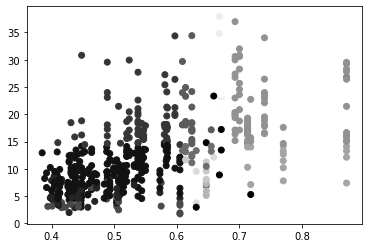

In [71]:
plot_clusters('NOX','LSTAT',False)